# 8. Introduction to NLP (Natural Language Processing) in TensorFlow Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

%matplotlib inline

In [2]:
!nvidia-smi

Fri Jul 15 10:45:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BASE_DIR = "/content/drive/MyDrive/TensorFlow Developer Certification"

In [5]:
# Read in the data
train_df = pd.read_csv(f'{BASE_DIR}/Data/NLP/train.csv')
test_df = pd.read_csv(f'{BASE_DIR}/Data/NLP/test.csv')

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df['text'].to_numpy(), train_df['target'].to_numpy(), test_size=0.1, random_state = 42)

In [8]:
pd.Series(train_labels).value_counts()/pd.Series(train_labels).value_counts().sum()

0    0.571595
1    0.428405
dtype: float64

In [9]:
train_df.target.value_counts()/train_df.target.value_counts().sum()

0    0.57034
1    0.42966
Name: target, dtype: float64

Great! The distribution is virtually the same which means we can proceed towards the training.

In [10]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-07-15 10:45:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-15 10:45:29 (72.5 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [11]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, make_confusion_matrix, calculate_results, unzip_data

### 1. Rebuild, compile and train model_1, model_2 and model_5 using the Keras Sequential API instead of the Functional API.

In [12]:
MAX_TOKENS = 10000
LENGTH_OF_SEQUENCE = 15

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = MAX_TOKENS, output_sequence_length = LENGTH_OF_SEQUENCE, pad_to_max_tokens = True, name = "text_vectorisation_layer")
text_vectorizer.adapt(train_sentences)

model_1 = tf.keras.Sequential(
    [
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.GlobalMaxPool1D(name = "global_max_pooling_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_1_sequential"
)

In [13]:
model_1.summary()

Model: "model_1_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_max_pooling_layer (G  (None, 128)              0         
 lobalMaxPooling1D)                                              
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
SAVE_DIR = f"{BASE_DIR}/TensorBoard/NLP"

In [15]:
# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_1 = model_1.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_1_dense_sequential")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_1_dense_sequential/20220715-104532
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6322 - accuracy: 0.6583 - val_loss: 0.5671 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4615 - accuracy: 0.8283 - val_loss: 0.4838 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3354 - accuracy: 0.8762 - val_loss: 0.4723 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2534 - accuracy: 0.9096 - val_loss: 0.4840 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1939 - accuracy: 0.9343 - val_loss: 0.5016 - val_accuracy: 0.7835


In [16]:
model_1_results = calculate_results(val_labels, tf.squeeze(tf.round(model_1.predict(val_sentences))))
model_1_results

{'accuracy': 78.34645669291339,
 'f1': 0.7815330350688786,
 'precision': 0.783834791912008,
 'recall': 0.7834645669291339}

And that sorts out model_1.

In [17]:
model_2 = tf.keras.Sequential(
    [
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_2"
)

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_2 = model_2.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_lstm_sequential")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_2_lstm_sequential/20220715-104545
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.5098 - accuracy: 0.7432 - val_loss: 0.4649 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3213 - accuracy: 0.8692 - val_loss: 0.5003 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2144 - accuracy: 0.9209 - val_loss: 0.6253 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1468 - accuracy: 0.9447 - val_loss: 0.7163 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1011 - accuracy: 0.9634 - val_loss: 0.9935 - val_accuracy: 0.7585


In [19]:
model_2_results = calculate_results(val_labels, tf.squeeze(tf.round(model_2.predict(val_sentences))))
model_2_results

{'accuracy': 75.8530183727034,
 'f1': 0.7532381055790521,
 'precision': 0.7631990142453567,
 'recall': 0.7585301837270341}

Okay. This seems to have worsened performance!

In [20]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "input_layer"),
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.Conv1D(64, 5, padding = "valid", activation = "relu", name = "conv_layer"),
        tf.keras.layers.GlobalMaxPool1D(name = "max_pooling_1d_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_5"
)

model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 conv_layer (Conv1D)         (None, 11, 64)            41024     
                                                                 
 max_pooling_1d_layer (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,321,089
Trainable params: 1,321,089
Non-tra

In [21]:
# Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_5 = model_5.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_5_conv1d_sequential")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_5_conv1d_sequential/20220715-104556
Epoch 1/5
215/215 [==============================] - 4s 6ms/step - loss: 0.5449 - accuracy: 0.7250 - val_loss: 0.4863 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3301 - accuracy: 0.8640 - val_loss: 0.5114 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2006 - accuracy: 0.9286 - val_loss: 0.5972 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1318 - accuracy: 0.9534 - val_loss: 0.6717 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0919 - accuracy: 0.9714 - val_loss: 0.7505 - val_accuracy: 0.7533


In [22]:
model_5_preds = tf.squeeze(tf.round(model_5.predict(val_sentences)))
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 75.32808398950131,
 'f1': 0.75144070746402,
 'precision': 0.7526712252675872,
 'recall': 0.7532808398950132}

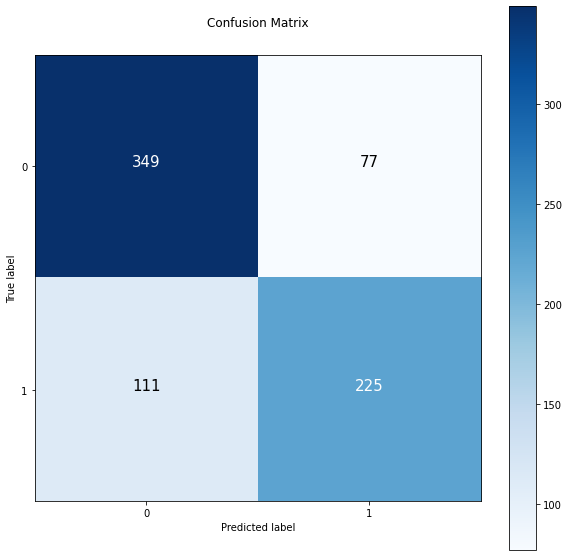

In [23]:
make_confusion_matrix(val_labels, model_5_preds)

### 2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [25]:
train_subset_idx = np.random.choice(len(train_sentences),int(0.1*len(train_sentences)))
train_sentences_subs = train_sentences[train_subset_idx]
train_labels_subs = train_labels[train_subset_idx]

In [26]:
pd.Series(train_labels_subs).value_counts()/pd.Series(train_labels_subs).value_counts().sum()

0    0.589781
1    0.410219
dtype: float64

It does retain the distribution reasonably enough.

In [27]:
model_baseline = Pipeline(
    [
        ("tf_idf_vectorizer", TfidfVectorizer()),
        ("naive_bayes", MultinomialNB())
    ]
)

model_baseline.fit(train_sentences_subs, train_labels_subs)

Pipeline(steps=[('tf_idf_vectorizer', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [28]:
baseline_predictions = model_baseline.predict(val_sentences)

In [29]:
model_baseline_results = calculate_results(val_labels, baseline_predictions)
model_baseline_results

{'accuracy': 70.34120734908137,
 'f1': 0.671996112941183,
 'precision': 0.7568650743065585,
 'recall': 0.7034120734908137}

### 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.

In [30]:
import tensorflow_hub as hub

In [31]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable = True, input_shape = (), dtype = tf.string, name = "USE")

model_USE_fine_tune = tf.keras.Sequential(
    [
        sentence_encoder_layer,
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ]
)

model_USE_fine_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 256,798,337
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
model_USE_fine_tune.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_USE_fine_tune = model_USE_fine_tune.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_USE_fine_tune")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_USE_fine_tune/20220715-104612
Epoch 1/5
215/215 [==============================] - 39s 158ms/step - loss: 0.4611 - accuracy: 0.7933 - val_loss: 0.4283 - val_accuracy: 0.8136
Epoch 2/5
215/215 [==============================] - 33s 152ms/step - loss: 0.2449 - accuracy: 0.9089 - val_loss: 0.4919 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 34s 157ms/step - loss: 0.0869 - accuracy: 0.9718 - val_loss: 0.5300 - val_accuracy: 0.8005
Epoch 4/5
215/215 [==============================] - 35s 163ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.5858 - val_accuracy: 0.7979
Epoch 5/5
215/215 [==============================] - 36s 168ms/step - loss: 0.0332 - accuracy: 0.9885 - val_loss: 0.6059 - val_accuracy: 0.7900


In [33]:
model_USE_fine_tune_preds = tf.squeeze(tf.round(model_USE_fine_tune.predict(val_sentences)))

In [34]:
model_USE_fine_tune_results = calculate_results(val_labels, model_USE_fine_tune_preds)
model_USE_fine_tune_results

{'accuracy': 79.00262467191601,
 'f1': 0.790368309224505,
 'precision': 0.791103136095994,
 'recall': 0.7900262467191601}

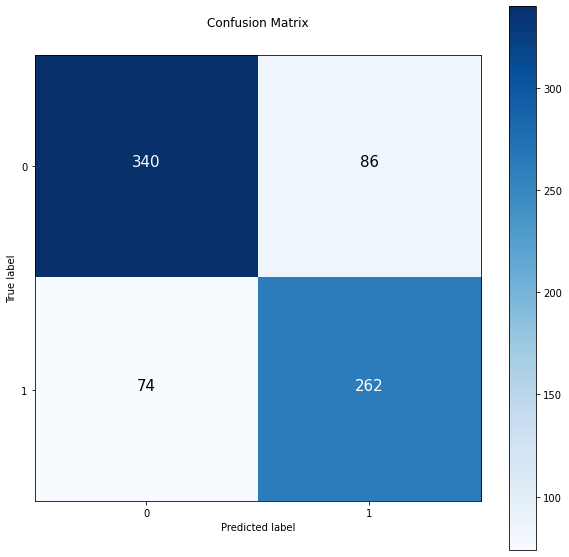

In [35]:
make_confusion_matrix(val_labels, model_USE_fine_tune_preds)

This is overfitting. Let's have another go.

In [36]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable = True, input_shape = (), dtype = tf.string, name = "USE")

model_USE_fine_tune_mod = tf.keras.Sequential(
    [
        sentence_encoder_layer,
        tf.keras.layers.Dense(128, activation = "relu", name = "prefinal_dense_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "USE_fine_tune"
)

model_USE_fine_tune_mod.summary()

Model: "USE_fine_tune"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 prefinal_dense_layer (Dense  (None, 128)              65664     
 )                                                               
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 256,863,617
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
model_USE_fine_tune_mod.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_USE_fine_tune_mod = model_USE_fine_tune_mod.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_USE_fine_tune")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_USE_fine_tune/20220715-104944
Epoch 1/5
215/215 [==============================] - 39s 156ms/step - loss: 0.4508 - accuracy: 0.7989 - val_loss: 0.4048 - val_accuracy: 0.8346
Epoch 2/5
215/215 [==============================] - 33s 152ms/step - loss: 0.2353 - accuracy: 0.9104 - val_loss: 0.4827 - val_accuracy: 0.7992
Epoch 3/5
215/215 [==============================] - 33s 152ms/step - loss: 0.0776 - accuracy: 0.9752 - val_loss: 0.5712 - val_accuracy: 0.8005
Epoch 4/5
215/215 [==============================] - 33s 152ms/step - loss: 0.0392 - accuracy: 0.9855 - val_loss: 0.6084 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 33s 152ms/step - loss: 0.0275 - accuracy: 0.9886 - val_loss: 0.6176 - val_accuracy: 0.7520


In [38]:
model_USE_fine_tune_mod_preds = tf.squeeze(tf.round(model_USE_fine_tune_mod.predict(val_sentences)))

In [39]:
model_USE_fine_tune_mod_results = calculate_results(val_labels, model_USE_fine_tune_mod_preds)
model_USE_fine_tune_mod_results

{'accuracy': 75.19685039370079,
 'f1': 0.7517655912513571,
 'precision': 0.7753410471948063,
 'recall': 0.7519685039370079}

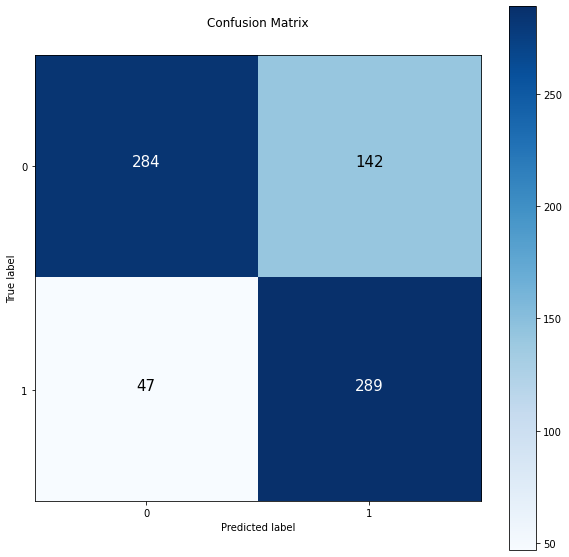

In [40]:
make_confusion_matrix(val_labels, model_USE_fine_tune_mod_preds)

Its still overfitting so I guess the model is too big for the kind and amount of data we have.

### 4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [41]:
model_USE_load = tf.keras.models.load_model(f"{BASE_DIR}/Model/NLP/08_model_6_USE_feature_extractor")
model_USE_load.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [42]:
train_df_shuffled = train_df.sample(frac = 1)

In [43]:
history_load_model = model_USE_load.fit(
    x = train_df_shuffled.text.to_numpy(),
    y = train_df_shuffled.target.to_numpy(),
    epochs = 5,
)

Epoch 1/5
238/238 [==============================] - 5s 10ms/step - loss: 0.3843 - accuracy: 0.8304
Epoch 2/5
238/238 [==============================] - 5s 19ms/step - loss: 0.3766 - accuracy: 0.8346
Epoch 3/5
238/238 [==============================] - 3s 13ms/step - loss: 0.3704 - accuracy: 0.8380
Epoch 4/5
238/238 [==============================] - 2s 10ms/step - loss: 0.3650 - accuracy: 0.8411
Epoch 5/5
238/238 [==============================] - 2s 10ms/step - loss: 0.3591 - accuracy: 0.8436


In [44]:
model_USE_best_preds = tf.squeeze(tf.round(model_USE_load.predict(test_df.text.to_numpy())))
model_USE_best_preds[:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [45]:
test_df["target"] = model_USE_best_preds.numpy().astype('int')
test_df[["id","target"]].to_csv(f"{BASE_DIR}/Kaggle_Submissions/NLP/disaster_predictions.csv", index = False)

### 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

To create such an ensemble model, the first ingredient is to define a function that takes in all the models and then predicts on the data such that the output resembles [num_examples, num_models]. With this done, next we need to either take the prediction that occurs either - max number of times for that example or average the predictions and round them off. We'll be trying both these options.

In [46]:
from scipy.stats import mode

In [47]:
def ensemble_model_predict(models_list, data, method = "max"):
  """
  Combines predictions from all models passed and returns the most probable predictions (I can already think of something better! Put a dense layer and then observe what we get. Possibly encase the models in an async function so they can run in parallel)
  """
  prediction_matrix = np.empty(shape = (len(data), len(models_list)))
  for col, model in enumerate(models_list):
    prediction_matrix[:, col] = np.squeeze(np.asarray(model.predict(data)))
  
  if method == "max":
    pred_mat_logits = np.round(prediction_matrix)
    predictions = np.squeeze(np.asarray(mode(pred_mat_logits, axis = 1)[0]))

  elif method == "average":
    pred_mat_avg = np.mean(prediction_matrix, axis = 1)
    predictions = np.squeeze(np.round(pred_mat_avg))
  
  return predictions

In [48]:
models_list = [model_1, model_2, model_5, model_baseline, model_USE_fine_tune, model_USE_fine_tune_mod, model_USE_load]
ensemble_preds = ensemble_model_predict(models_list, val_sentences, method = "max")
model_ensemble_results = calculate_results(val_labels, ensemble_preds)
model_ensemble_results

{'accuracy': 80.70866141732283,
 'f1': 0.8050028495441929,
 'precision': 0.8087734600841846,
 'recall': 0.8070866141732284}

Beauty! I don't think we got these numbers for the f1-score before! This is worth investigating.

In [49]:
ensemble_preds = ensemble_model_predict(models_list, val_sentences, method = "average")
model_ensemble_results = calculate_results(val_labels, ensemble_preds)
model_ensemble_results

{'accuracy': 81.62729658792651,
 'f1': 0.8134503420096791,
 'precision': 0.8206163773347821,
 'recall': 0.8162729658792651}

Clearly `mode` works better than `mean` here. But can we do better? Maybe we don't need to figure out the mean/mode that works best. Rather we can simply use a `Dense` layer to figure out the optimal combination in which the predictions of these models can be combined for the best possible output. Although we do risk overfitting here 😜

In [50]:
def ensemble_model_train(models_list, data, labels, val_data, val_labels, epochs = 5):
  """
  Combines predictions from all models passed and returns the most probable predictions (I can already think of something better! Put a dense layer and then observe what we get. Possibly encase the models in an async function so they can run in parallel)
  """
  prediction_matrix = np.empty(shape = (len(data), len(models_list)))
  for col, model in enumerate(models_list):
    prediction_matrix[:, col] = np.squeeze(np.asarray(model.predict(data)))

  val_prediction_matrix = np.empty(shape = (len(val_data), len(models_list)))
  for col, model in enumerate(models_list):
    val_prediction_matrix[:, col] = np.squeeze(np.asarray(model.predict(val_data)))
  model_out = tf.keras.Sequential([
                                   tf.keras.layers.Input(shape = (len(models_list),), name = "input_ensemble_final_output_pipeline"),
                                   tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_ensemble")
                                   ])
  # Compile the model
  model_out.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Fit the model
  history = model_out.fit(x = prediction_matrix, y = labels, epochs = epochs, validation_data = (val_prediction_matrix, val_labels))
  print(model_out.predict(val_prediction_matrix).max(), model_out.predict(val_prediction_matrix).min())
  return model_out, history, models_list

In [51]:
model_out, history, models_list = ensemble_model_train(models_list, train_sentences, train_labels, val_sentences, val_labels)

Epoch 1/5
215/215 [==============================] - 1s 3ms/step - loss: 1.0762 - accuracy: 0.0825 - val_loss: 0.7804 - val_accuracy: 0.3425
Epoch 2/5
215/215 [==============================] - 1s 3ms/step - loss: 0.7900 - accuracy: 0.1766 - val_loss: 0.6531 - val_accuracy: 0.6811
Epoch 3/5
215/215 [==============================] - 1s 3ms/step - loss: 0.6216 - accuracy: 0.7270 - val_loss: 0.5835 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.8889 - val_loss: 0.5386 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 3ms/step - loss: 0.4272 - accuracy: 0.9352 - val_loss: 0.5074 - val_accuracy: 0.7861
0.85284835 0.3357357


In [55]:
def ensemble_model_predict(models_list, data, method = "max"):
  """
  Combines predictions from all models passed and returns the most probable predictions (I can already think of something better! Put a dense layer and then observe what we get. Possibly encase the models in an async function so they can run in parallel)
  """
  prediction_matrix = np.empty(shape = (len(data), len(models_list)))
  for col, model in enumerate(models_list):
    prediction_matrix[:, col] = np.squeeze(np.asarray(model.predict(data)))
  
  if method == "max":
    pred_mat_logits = np.round(prediction_matrix)
    predictions = np.squeeze(np.asarray(mode(pred_mat_logits, axis = 1)[0]))

  elif method == "average":
    pred_mat_avg = np.mean(prediction_matrix, axis = 1)
    predictions = np.squeeze(np.round(pred_mat_avg))

  elif isinstance(model_out, tf.keras.Sequential):
    model_out_pred = model_out.predict(prediction_matrix)
    predictions = np.round(model_out_pred)
  
  return predictions

In [56]:
ensemble_preds = ensemble_model_predict(models_list, val_sentences, method = model_out)
model_ensemble_results = calculate_results(val_labels, ensemble_preds)
model_ensemble_results

{'accuracy': 78.60892388451444,
 'f1': 0.7868366238552041,
 'precision': 0.7925849388489975,
 'recall': 0.7860892388451444}

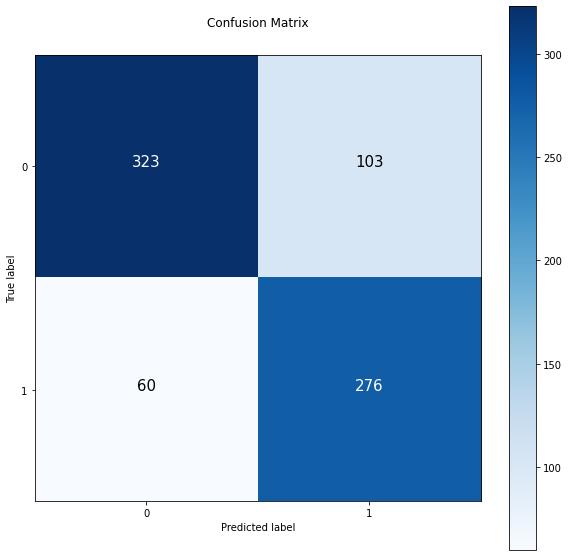

In [54]:
make_confusion_matrix(val_labels, ensemble_preds)

Yeah no. The ensemble strategy seems to be pulling down performance. Maybe it might work best for models with comparable accuracies and different strengths. But who knows maybe further down the line I might just find a way through?